In [1]:
# IMPORTING THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Default_Fin.csv to Default_Fin (1).csv


In [3]:
uploaded.keys()


dict_keys(['Default_Fin.csv'])

In [4]:
# importing dataset
default=pd.read_csv("Default_Fin.csv")
default.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [5]:
default.shape

(10000, 5)

In [6]:
default.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


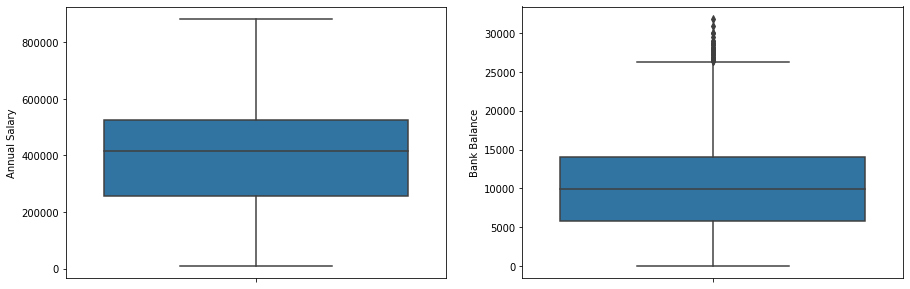

In [7]:
#boxplot
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=default["Annual Salary"])

plt.subplot(1,2,2)
sns.boxplot(y=default["Bank Balance"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


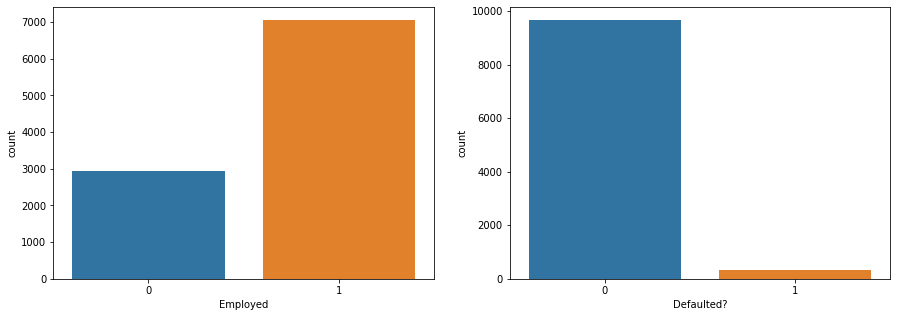

In [8]:
#countplot
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(default["Employed"])

plt.subplot(1,2,2)
sns.countplot(default["Defaulted?"])
plt.show()


In [9]:
#value count
default["Employed"].value_counts()

1    7056
0    2944
Name: Employed, dtype: int64

In [10]:
default["Defaulted?"].value_counts()

0    9667
1     333
Name: Defaulted?, dtype: int64

In [11]:
# value count in the form of percentage
default["Employed"].value_counts(normalize=True)

1    0.7056
0    0.2944
Name: Employed, dtype: float64

In [12]:
default["Defaulted?"].value_counts(normalize=True)

0    0.9667
1    0.0333
Name: Defaulted?, dtype: float64

## bivariate analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


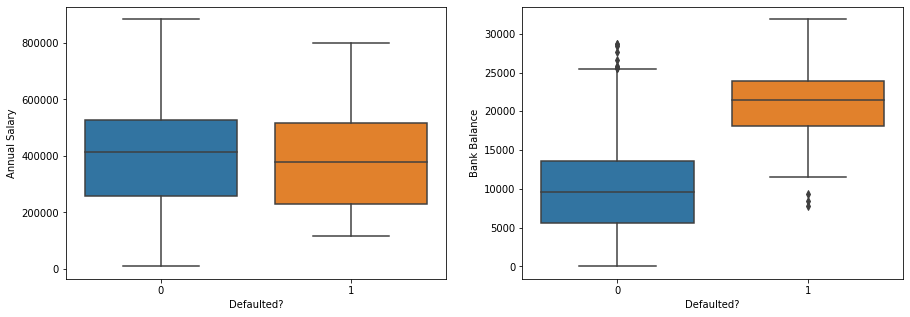

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(default["Defaulted?"],default["Annual Salary"])

plt.subplot(1,2,2)
sns.boxplot(default["Defaulted?"],default["Bank Balance"])
plt.show()

In [14]:
# cross tab
pd.crosstab(default["Employed"],default["Defaulted?"],normalize="index").round(2)

Defaulted?,0,1
Employed,,
0,0.96,0.04
1,0.97,0.03


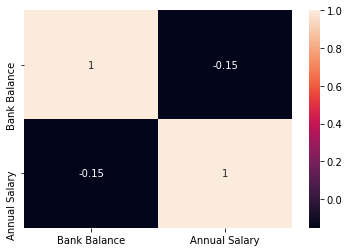

In [15]:
#heatmap to check correlation
sns.heatmap(default[["Bank Balance","Annual Salary"]].corr(),annot=True)
plt.show()

In [16]:
# to check null values
default.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

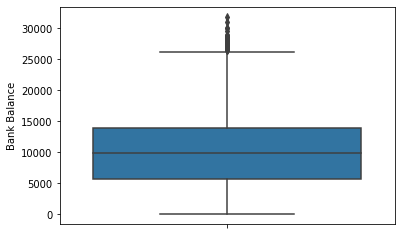

In [17]:
sns.boxplot(y=default["Bank Balance"])
plt.show()

In [18]:
q1,q2=default["Bank Balance"].quantile([0.25,0.75])

In [19]:
# inter quantile range
iqr=q2-q1
iqr

8214.87

In [20]:
# lower limit
ll=q1-(1.5*iqr)
ll

-6541.515000000001

In [21]:
# upper limit
ul=q2+(1.5*iqr)
ul

26317.965

In [22]:
# values in database which are greater than upper limit
df=default[default["Bank Balance"]>ul]
df.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
173,174,0,26469.60,171257.88,1
1136,1137,1,29988.24,618051.48,1
1160,1161,0,30032.16,179370.24,1
1359,1360,1,26651.64,488701.20,1
1502,1503,0,27994.56,141242.76,1


In [23]:
df["Bank Balance"].count()

31

In [24]:
#how many defaulters are from outlier
df["Defaulted?"].value_counts()


1    26
0     5
Name: Defaulted?, dtype: int64

In [25]:
# setting valus which are greater than upper limit to the value of upper limit
default["Bank Balance"]=np.where(default["Bank Balance"]>ul,ul,default["Bank Balance"])

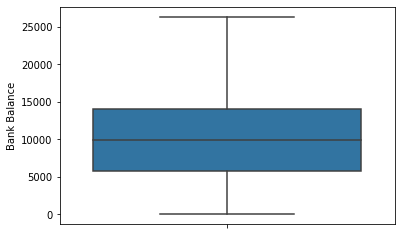

In [26]:
sns.boxplot(y=default["Bank Balance"])
plt.show()

In [27]:
default[default["Bank Balance"]==ul].count()

Index            31
Employed         31
Bank Balance     31
Annual Salary    31
Defaulted?       31
dtype: int64

In [28]:
default=default.drop("Index",axis=1)

In [29]:
default.columns=["employed","balance","income","default"]
default.head()

,employed,balance,income,default
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


In [30]:
#applying logistic regresion
from sklearn.model_selection import train_test_split

In [31]:
x=default.drop("default",axis=1)
y=default["default"]

In [58]:
x.head()

,employed,balance,income
0,1,8754.36,532339.56
1,0,9806.16,145273.56
2,1,12882.60,381205.68
3,1,6351.00,428453.88
4,1,9427.92,461562.00


In [57]:
0x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=21,stratify=y)

In [33]:
print(x_train.shape)
print(y_train.shape)

(7000, 3)
(7000,)


In [34]:
print(y_train.value_counts(normalize=True).round(2))
print(" ")
print(y_test.value_counts(normalize=True).round(2))

0    0.97
1    0.03
Name: default, dtype: float64
 
0    0.97
1    0.03
Name: default, dtype: float64


In [35]:
!pip install imblearn

In [36]:
# SMOTE (synthetic minority over sampling technique)
import imblearn
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [38]:
sm=SMOTE(random_state=33, sampling_strategy=0.75)

In [39]:
x_res,y_res=sm.fit_sample(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [44]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr=LogisticRegression()


In [48]:
lr.fit(x_res,y_res)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
y_pred=lr.predict(x_test)

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
confusion_matrix(y_test,y_pred)


array([[2103,  797],
       [  28,   72]])

In [61]:
#calculating accuracy
(2103+72)/(2103+797+28+72)


0.725